## Exercise 3.1
Below you find the plots and the correlograms of four datasets. The correlograms have been permutated. Please find for each data sets (A-D) the appropriate corellogram.

In [3]:
library(fma)

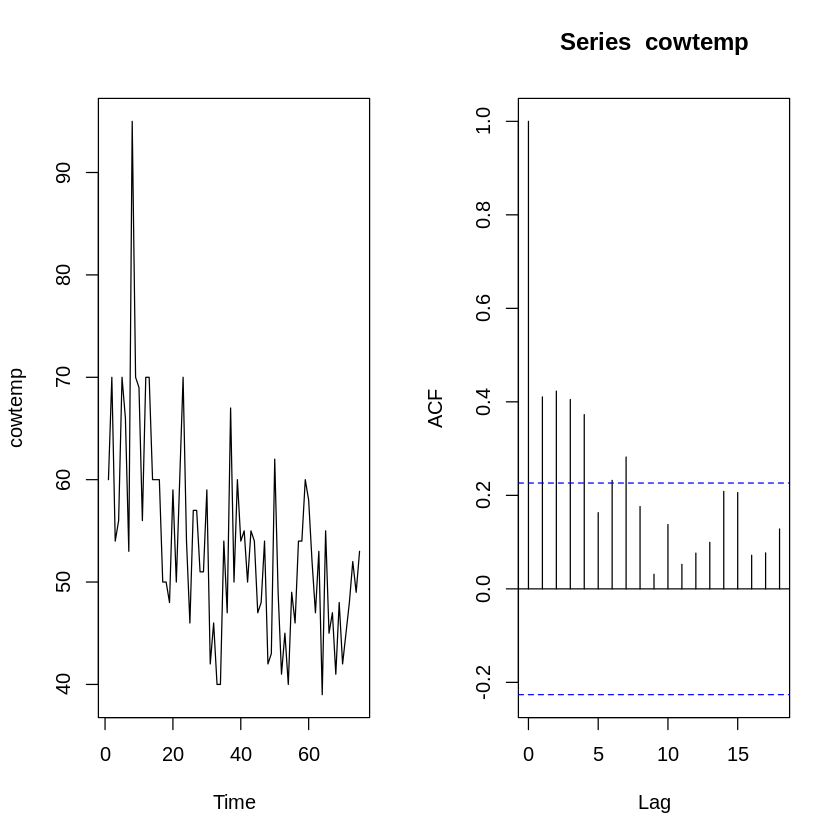

In [8]:
par(mfrow = c(1, 2))

plot(cowtemp)
acf(cowtemp)

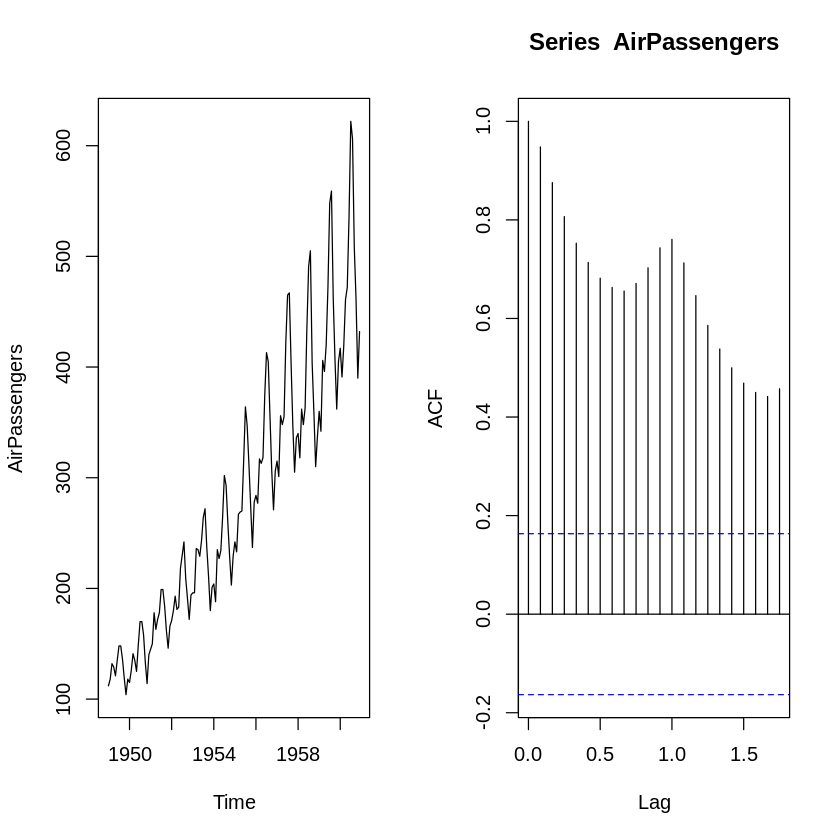

In [9]:
par(mfrow = c(1, 2))

plot(AirPassengers)
acf(AirPassengers)

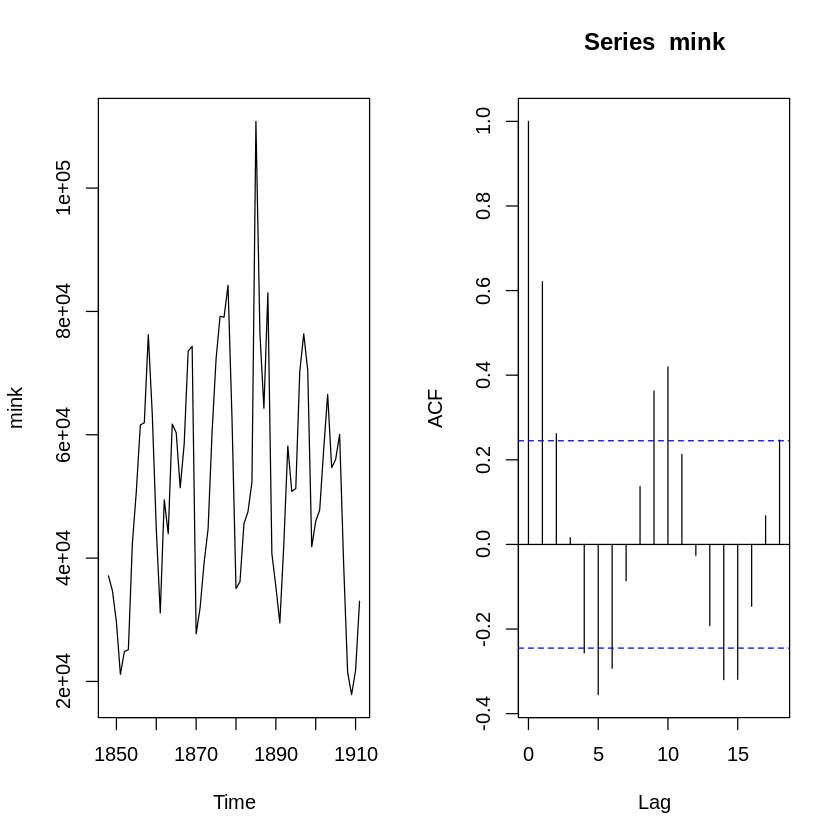

In [10]:
par(mfrow = c(1, 2))

plot(mink)
acf(mink)

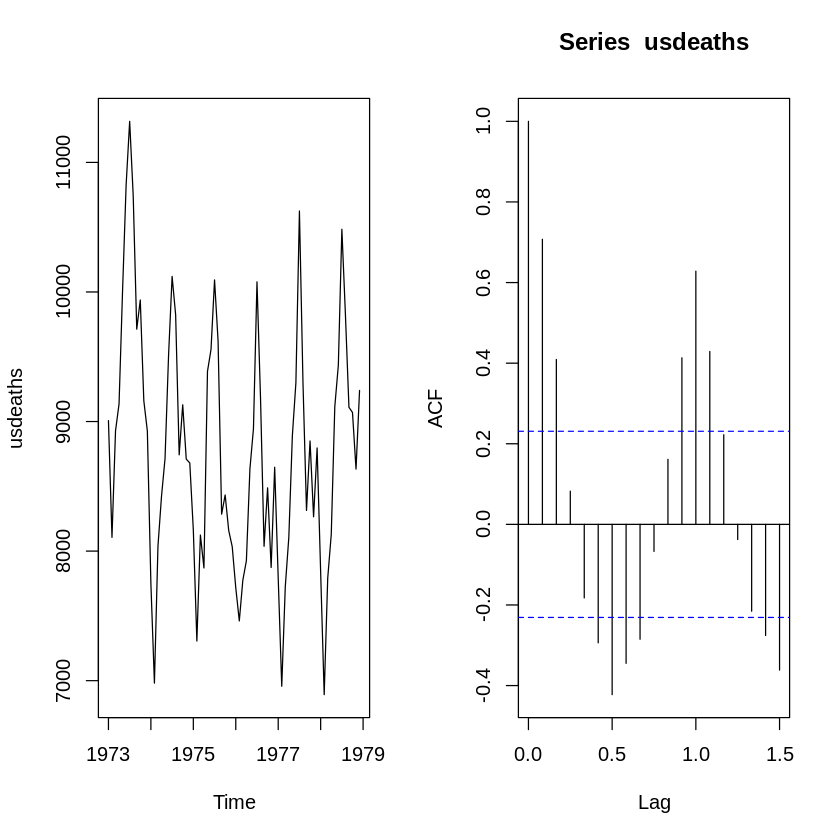

In [11]:
par(mfrow = c(1, 2))

plot(usdeaths)
acf(usdeaths)

**Solution**: A2, B3, C1, D4

## Exercise 3.2
Let us now consider the electricity production of Australia in GWh in the period from January 1958 to December 1990. You may download the data from https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/cbe.dat.

The aim of this exercise is to compare the effect of different algorithms to decompose a time series representation in trend, seasonality and remainder by means of their (partial) autocorrelation function.

In [23]:
library(readr)
cbe.d <- read_tsv('https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/cbe.dat')


── Column specification ────────────────────────────────────────────────────────
cols(
  choc = col_double(),
  beer = col_double(),
  elec = col_double()
)




a) Start by considering the plot of the time series. Why is not meaningful to interpret the correlogram of this time series?
Explain in a few sentences.

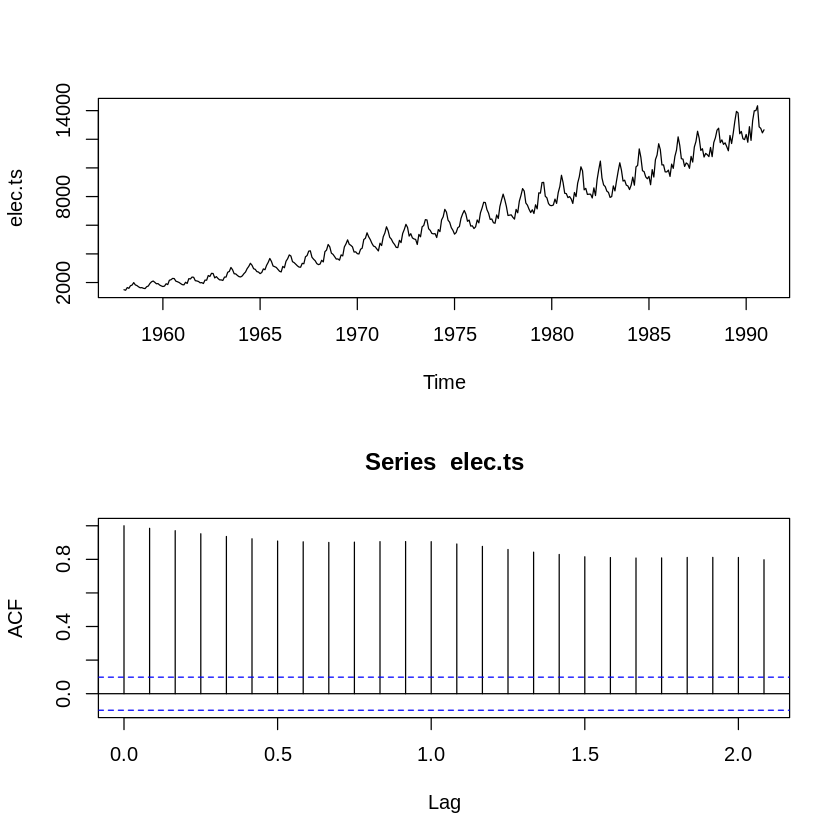

In [35]:
par(mfrow = c(2, 1))
elec.ts <- ts(cbe.d$elec, start=c(1958,1),frequency=12)
plot(elec.ts)
acf(elec.ts)

**Interpretation**: It is not meaningful to interpret the correlogram, because already in the plot, we can se a strong seasonality and trend.

b) Decompose the time series into trend, seasonal component and remainder using the R function decompose(), which performs the decomposition with moving averages. Plot the remainder and its correlogram and interpret the plots in a few sentences.

List of 6
 $ x       : Time-Series [1:396] from 1958 to 1991: 1497 1463 1648 1595 1777 ...
 $ seasonal: Time-Series [1:396] from 1958 to 1991: 0.909 0.891 0.97 0.938 1.051 ...
 $ trend   : Time-Series [1:396] from 1958 to 1991: NA NA NA NA NA ...
 $ random  : Time-Series [1:396] from 1958 to 1991: NA NA NA NA NA ...
 $ figure  : num [1:12] 0.909 0.891 0.97 0.938 1.051 ...
 $ type    : chr "multiplicative"
 - attr(*, "class")= chr "decomposed.ts"


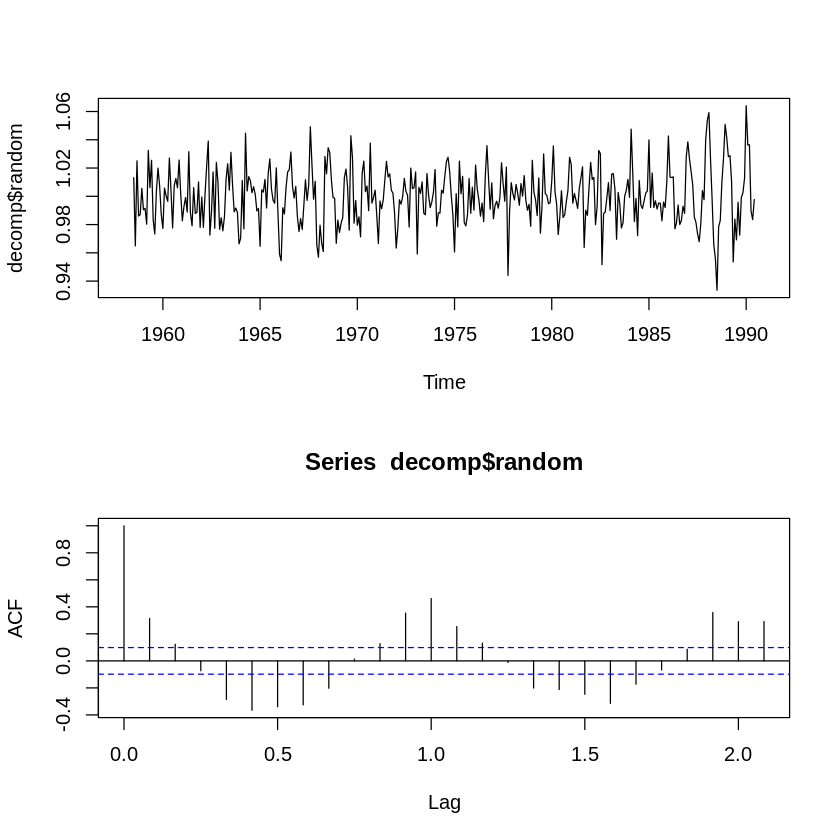

In [55]:
par(mfrow = c(2, 1))

decomp <- decompose(elec.ts, type = "multiplicative")
str(decomp)

plot(decomp$random)
acf(decomp$random, na.action = na.pass, plot = TRUE)

c) Decompose the log-transformed time series using the R function stl(). Estimate the seasonal effect once by averaging over all years (parameter s.window = "periodic") and once by choosing an appropriate smoothing window (parameter s.window = ...). Recall that the window length has to be odd. An appropriate smoothing window may be determined by the R-function monthplot().
For both estimation approaches (averaging and smoothing window), plot the remainder and its correlogram, and comment on the plots.

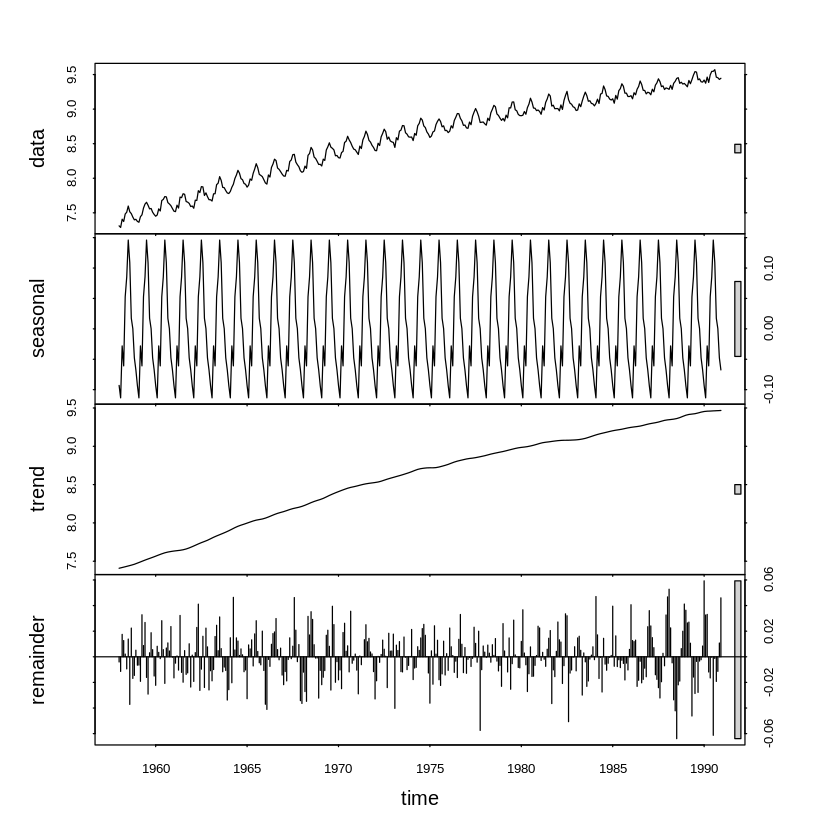

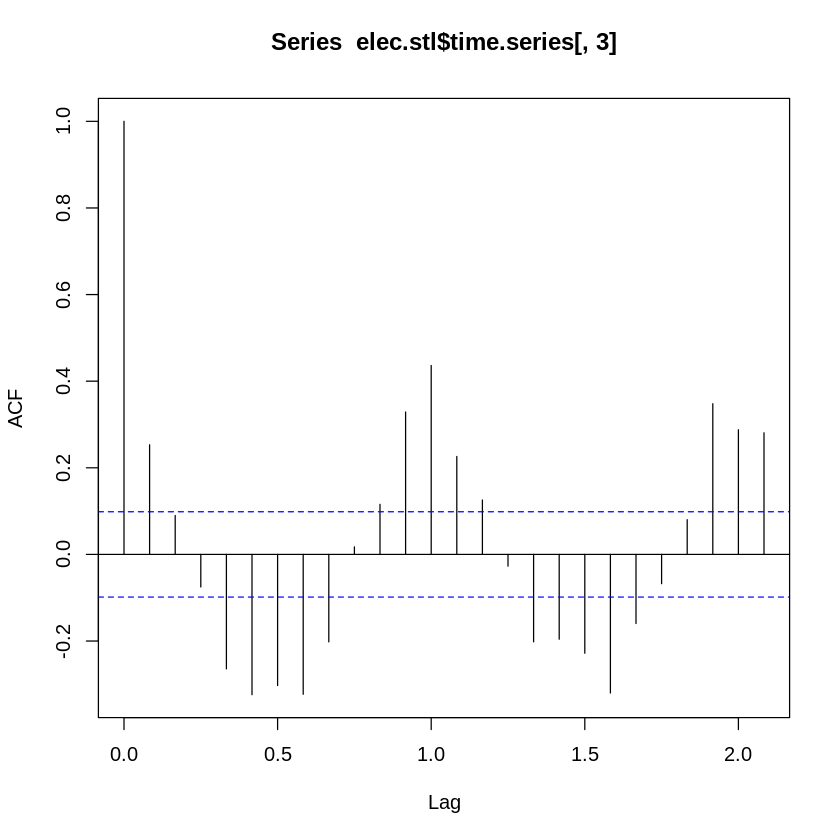

In [56]:
elec.stl <- stl(log(elec.ts), s.window = "periodic")
plot(elec.stl)
acf(elec.stl$time.series[,3])

**Interpratiation**:

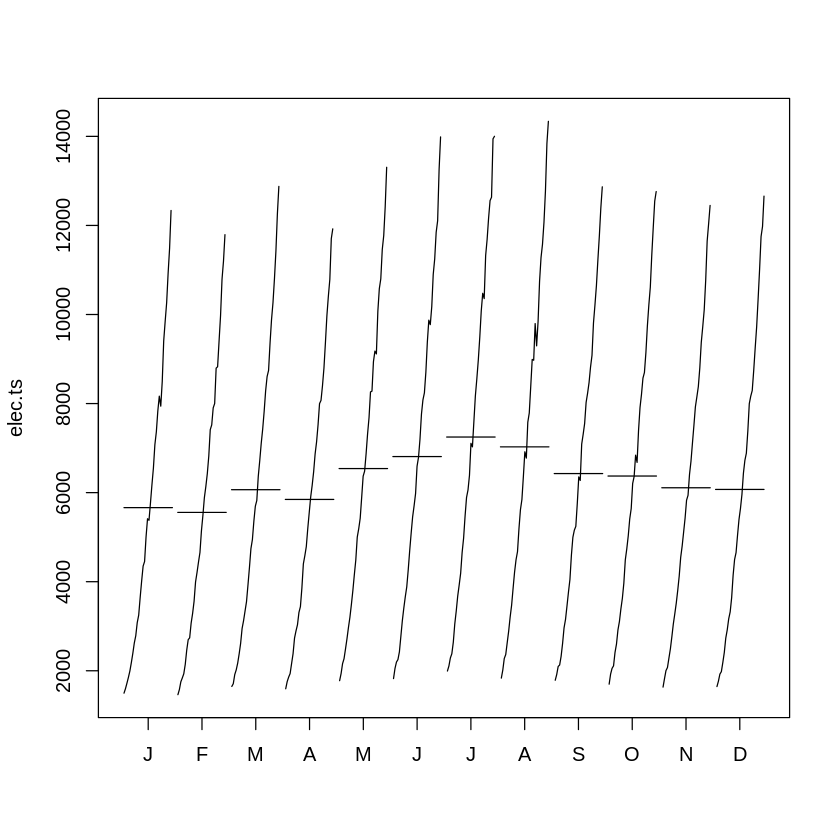

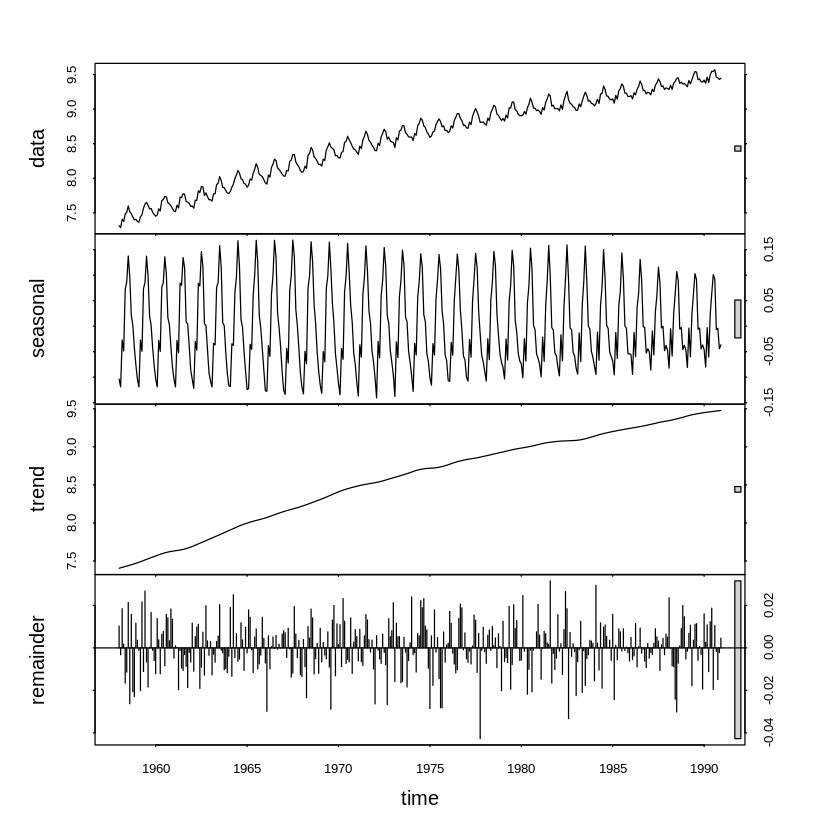

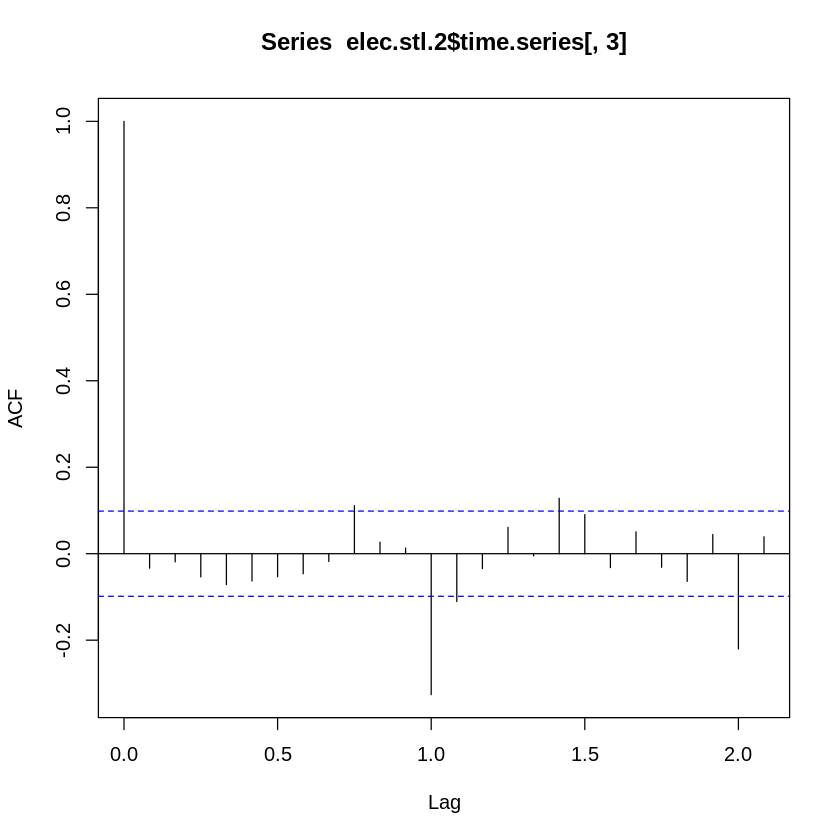

In [68]:
monthplot(elec.ts)
elec.stl.2 <- stl(log(elec.ts), s.window = 7)
plot(elec.stl.2)
acf(elec.stl.2$time.series[,3])

**Interpratiation**:

d) Explain why you used the parameter type = "multiplicative" in Task b), and why you log-transformed the time series before performing an stl() decomposition in Task c).

e) As a last algorithm consider the differencing approach. Choose a lag of 1 and 12 (months) to eliminate a trend and periodic structures. Plot the resulting time series and autocorrelation function. Compare the results to the previous methods.